In [4]:
# 1. Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For map visualization if you have latitude & longitude
import folium
from folium.plugins import HeatMap




df = pd.read_csv("accidents.csv")   # change filename as per your file
df.head()


,id,city,date,time,latitude,longitude,weather,road_condition,severity
0,1,Chennai,2023-01-01,00:00:00,18.991539,73.627567,rain,dry,minor
1,2,Kolkata,2023-01-01,01:00:00,21.413999,75.510838,clear,dry,serious
2,3,Bangalore,2023-01-01,02:00:00,28.192246,84.764038,clear,wet,fatal
3,4,Kolkata,2023-01-01,03:00:00,13.858379,85.878892,clear,wet,minor
4,5,Kolkata,2023-01-01,04:00:00,23.108256,82.321344,cloudy,dry,minor


In [5]:
print(df.head())
print(df.shape)
print(df.columns)
print(df.info())
print(df.isna().sum())


   id       city        date      time   latitude  longitude weather  \
0   1    Chennai  2023-01-01  00:00:00  18.991539  73.627567    rain   
1   2    Kolkata  2023-01-01  01:00:00  21.413999  75.510838   clear   
2   3  Bangalore  2023-01-01  02:00:00  28.192246  84.764038   clear   
3   4    Kolkata  2023-01-01  03:00:00  13.858379  85.878892   clear   
4   5    Kolkata  2023-01-01  04:00:00  23.108256  82.321344  cloudy   

  road_condition severity  
0            dry    minor  
1            dry  serious  
2            wet    fatal  
3            wet    minor  
4            dry    minor  
(5000, 9)
Index(['id', 'city', 'date', 'time', 'latitude', 'longitude', 'weather',
       'road_condition', 'severity'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              5000 non-null   int64  
 1   city      

In [6]:
# Drop duplicates if any
df.drop_duplicates(inplace=True)

# Fill missing values if necessary
# Example for numerical columns
for col in df.select_dtypes(include=[np.number]).columns:
    df[col].fillna(df[col].median(), inplace=True)

# Example for categorical columns
for col in df.select_dtypes(include=[object]).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Confirm no missing values left
print(df.isna().sum())


id                0
city              0
date              0
time              0
latitude          0
longitude         0
weather           0
road_condition    0
severity          0
dtype: int64


/tmp/ipython-input-2049447215.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-2049447215.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

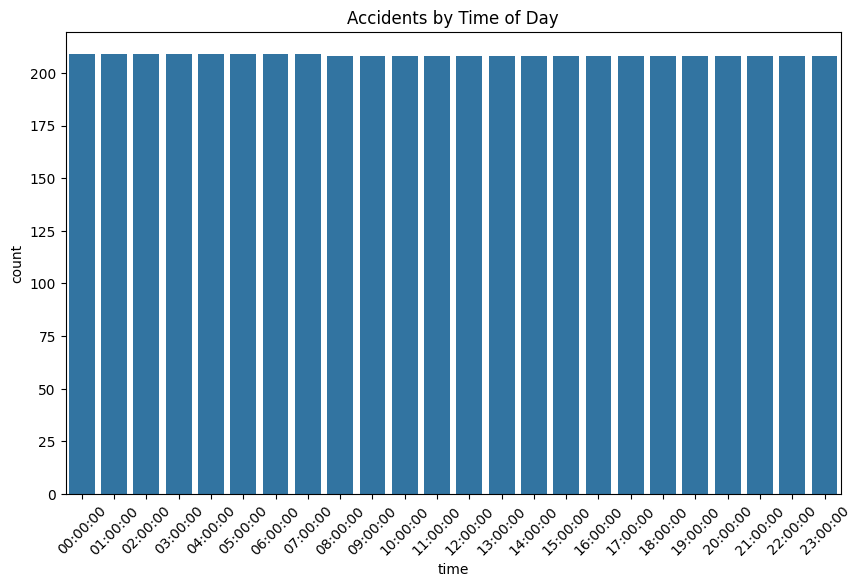

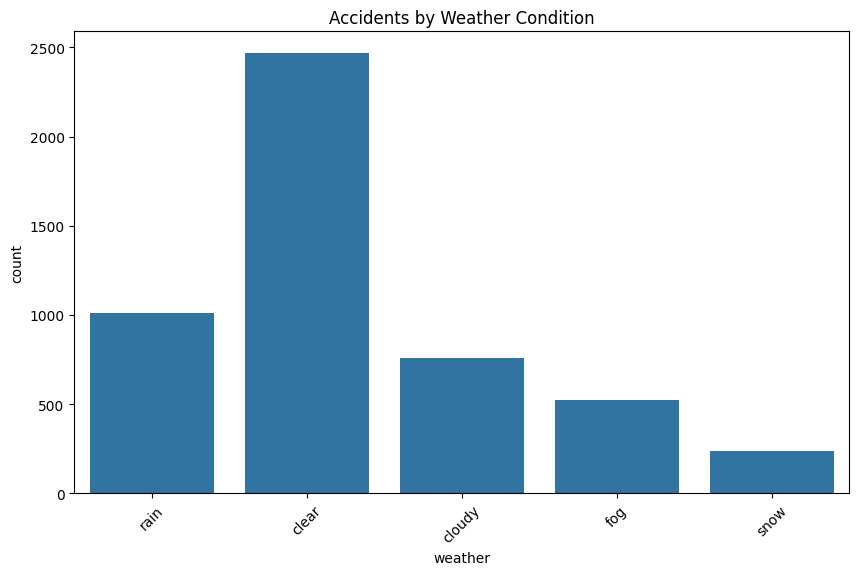

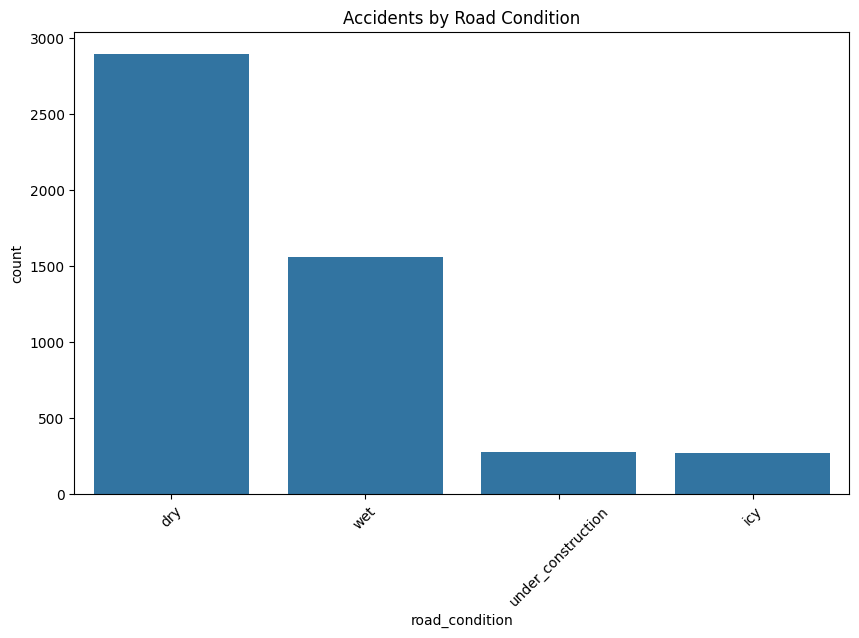

In [8]:
# Check distribution of accidents by time of day
plt.figure(figsize=(10,6))
sns.countplot(x='time', data=df)  # change 'Time' to your column name
plt.xticks(rotation=45)
plt.title('Accidents by Time of Day')
plt.show()

# Accidents by weather condition
plt.figure(figsize=(10,6))
sns.countplot(x='weather', data=df)
plt.xticks(rotation=45)
plt.title('Accidents by Weather Condition')
plt.show()

# Accidents by road condition
plt.figure(figsize=(10,6))
sns.countplot(x='road_condition', data=df)
plt.xticks(rotation=45)
plt.title('Accidents by Road Condition')
plt.show()

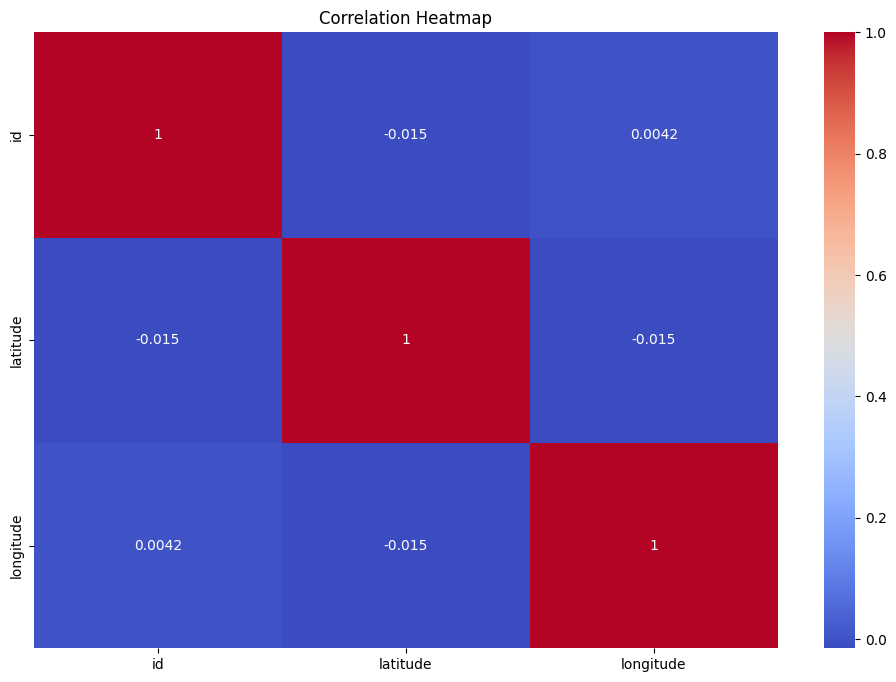

In [10]:
plt.figure(figsize=(12,8))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [11]:
# Create a map centered around mean coordinates
if 'latitude' in df.columns and 'longitude' in df.columns:
    m = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=10)
    heat_data = [[row['latitude'], row['longitude']] for index, row in df.iterrows()]
    HeatMap(heat_data).add_to(m)
    m  # This will display the map in Colab